# Importing Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salaries.csv")

In [3]:
df.head(20)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [4]:
print(df.shape)
df.describe()

(397, 6)


,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [5]:
df.describe(include="O")

,rank,discipline,sex
count,397,397,397
unique,3,2,2
top,Prof,B,Male
freq,266,216,358


In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

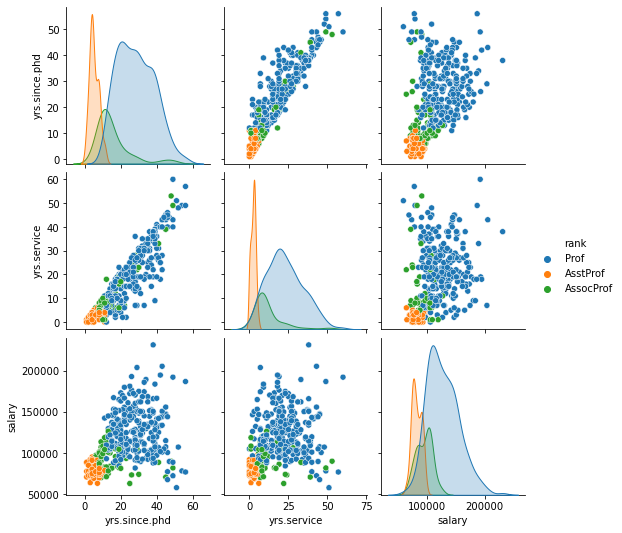

In [7]:
sns.pairplot(df,hue='rank')

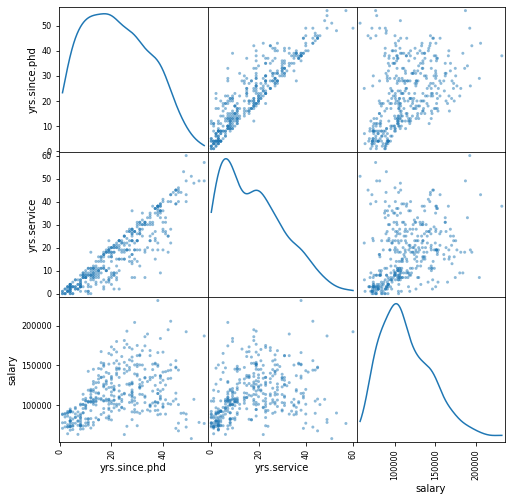

In [8]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

a =scatter_matrix(df, alpha=0.5, figsize=(8, 8), diagonal='kde')
pyplot.show()

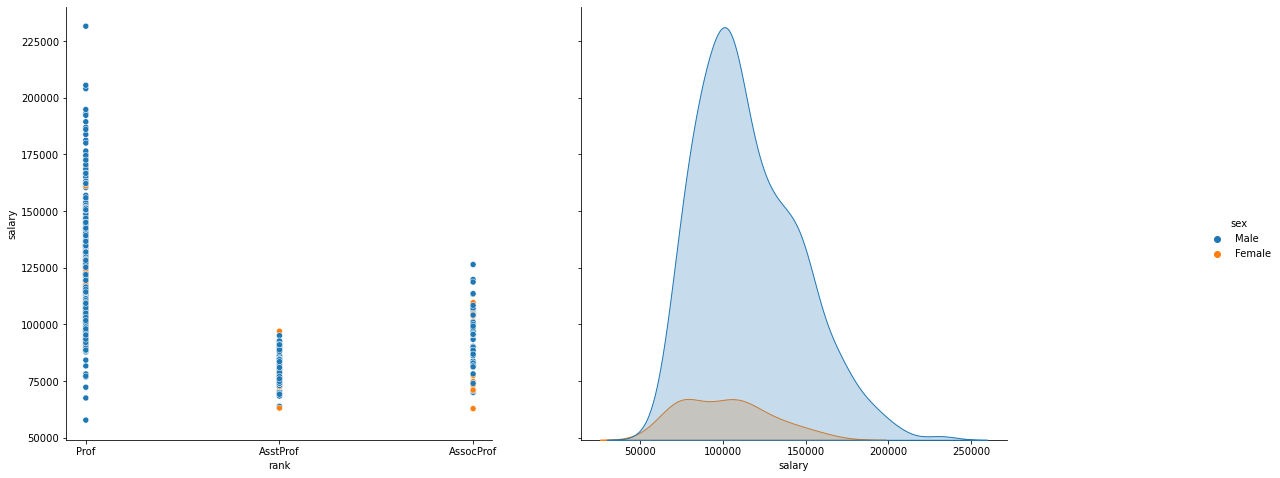

In [9]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(df,x_vars=['rank','salary'],y_vars=['salary'],hue='sex').fig.set_size_inches(20,8)

In [10]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

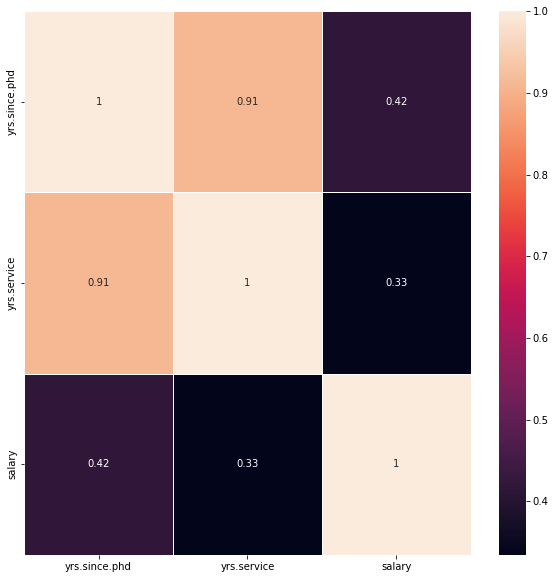

In [11]:
sns.heatmap(df.corr(),annot=True,lw=1)

In [12]:
X = df[['sex', 'yrs.service', 'rank', 'discipline']]

In [13]:
X = pd.get_dummies(data=X)
#c X.head()
new_df = X
new_df["yrs.since.phd"] = df['yrs.since.phd']
new_df["yrs.service"] = df["yrs.service"]
new_df

,yrs.service,sex_Female,sex_Male,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,yrs.since.phd
0,18,0,1,0,0,1,0,1,19
1,16,0,1,0,0,1,0,1,20
2,3,0,1,0,1,0,0,1,4
3,39,0,1,0,0,1,0,1,45
4,41,0,1,0,0,1,0,1,40
...,...,...,...,...,...,...,...,...,...
392,30,0,1,0,0,1,1,0,33
393,19,0,1,0,0,1,1,0,31
394,25,0,1,0,0,1,1,0,42
395,15,0,1,0,0,1,1,0,25


In [14]:
Y = df['salary']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(297, 9)
(100, 9)
(297,)
(100,)


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
print(model.intercept_)

94027.46490363289


In [18]:
predictions = model.predict(X_test)
predictions

array([115869.12253066, 119548.56543565,  66943.22288737,  98440.56411438,
       137798.97609827,  88834.49549075, 135884.33763397,  85763.19796957,
        95601.08516581, 119122.88070471, 129138.41982834, 120546.8769423 ,
       136028.21732261, 137448.52265411, 119731.02608853,  97955.87622265,
       140558.40113952,  68392.46394205, 122025.05372016,  85931.19076086,
       134703.56547445, 119879.72839769, 135889.1602545 , 133273.61490189,
        86011.23077313, 116952.31056516,  86411.05603207,  86574.22620282,
       121392.79523369, 118406.37424037, 128653.7319366 , 131710.56159618,
       139421.03256477, 134247.81330589, 136344.91242306, 134425.45133824,
       121046.03269563, 133115.26735166, 132462.58666864, 122519.38685295,
       121309.67897026, 121650.48717335, 101828.55673601, 118080.03389886,
       135290.66011174, 137127.00493313, 133599.9552434 , 140236.88341854,
       137679.20951228, 134084.64313514, 118094.50176044,  98119.0463934 ,
       125508.69982513,  

<AxesSubplot:xlabel='salary'>

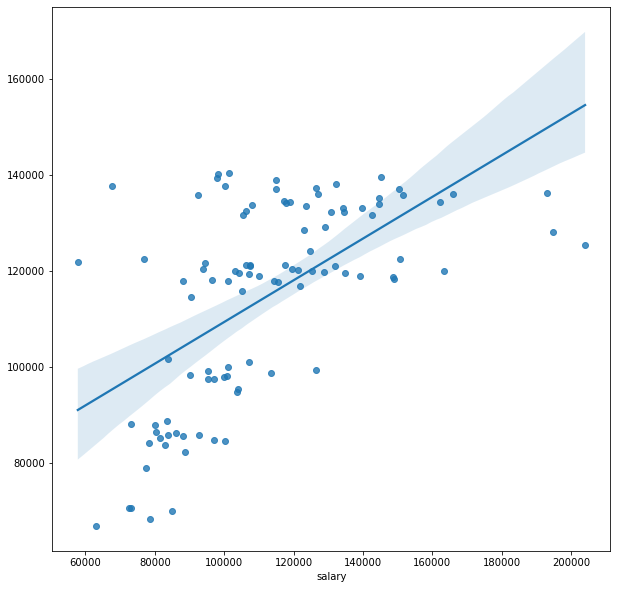

In [19]:
sns.regplot(y_test,predictions)

In [20]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     45.56
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.94e-39
Time:                        00:28:52   Log-Likelihood:                -3393.5
No. Observations:                 297   AIC:                             6801.
Df Residuals:                     290   BIC:                             6827.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            4.03e+04   1504.534     26.

In [21]:
from sklearn.metrics import r2_score
print("Accuracy of model is", round((r2_score(y_test, predictions)*100), 2), "%")

Accuracy of model is 32.38 %


In [22]:
def model_new(test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    sns.regplot(y_test,predictions)
    return "Accuracy of model is", round((r2_score(y_test, predictions)*100), 2), "%"

('Accuracy of model is', 49.34, '%')

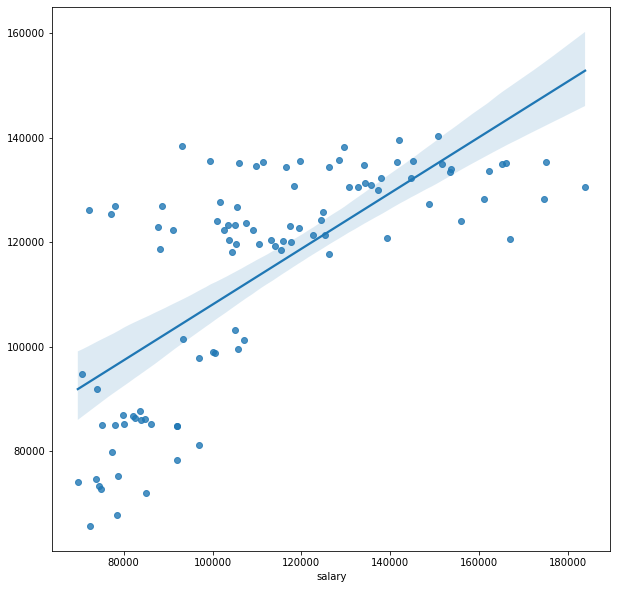

In [23]:
model_new(0.25, 1)

# KNN

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

<AxesSubplot:xlabel='salary'>

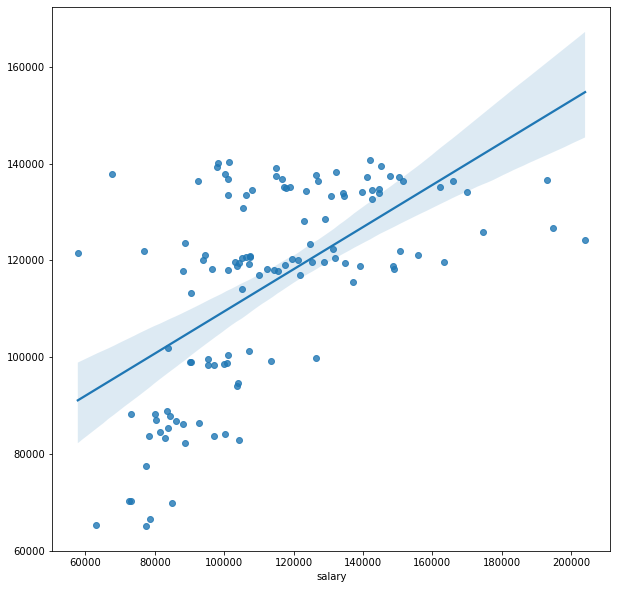

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)

In [26]:
x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

In [27]:
x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [28]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', round(error,3), "Accuracy = ", round((r2_score(y_test, pred)*100), 2), "%")

RMSE value for k=  1 is: 27696.304 Accuracy =  4.44 %
RMSE value for k=  2 is: 23190.689 Accuracy =  33.0 %
RMSE value for k=  3 is: 22151.632 Accuracy =  38.87 %
RMSE value for k=  4 is: 22100.969 Accuracy =  39.15 %
RMSE value for k=  5 is: 22724.118 Accuracy =  35.67 %
RMSE value for k=  6 is: 21597.172 Accuracy =  41.89 %
RMSE value for k=  7 is: 21839.869 Accuracy =  40.58 %
RMSE value for k=  8 is: 22956.226 Accuracy =  34.35 %
RMSE value for k=  9 is: 23027.265 Accuracy =  33.94 %
RMSE value for k=  10 is: 22803.651 Accuracy =  35.22 %
RMSE value for k=  11 is: 22689.401 Accuracy =  35.87 %
RMSE value for k=  12 is: 22518.982 Accuracy =  36.82 %
RMSE value for k=  13 is: 22363.156 Accuracy =  37.7 %
RMSE value for k=  14 is: 22444.079 Accuracy =  37.24 %
RMSE value for k=  15 is: 22492.072 Accuracy =  36.98 %
RMSE value for k=  16 is: 22540.954 Accuracy =  36.7 %
RMSE value for k=  17 is: 22261.772 Accuracy =  38.26 %
RMSE value for k=  18 is: 22157.451 Accuracy =  38.84 %
RMSE 

<AxesSubplot:>

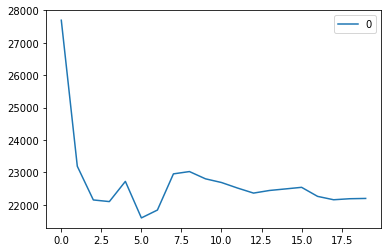

In [30]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

KNN model with k=6, gives accuracy of 41.89 %

<AxesSubplot:xlabel='salary'>

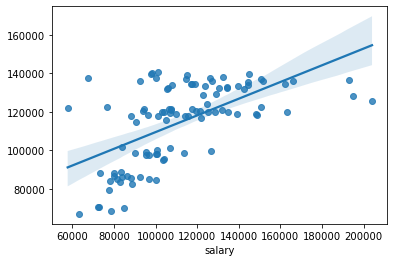

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
# "Accuracy of model is", round((r2_score(y_test, predictions)*100), 2), "%"

# Conclusion: For predicting salary, it is good to have linear regression model.

In [34]:
def user_input(yrs_service=12, yrs_since_phd=12, sex="Male", rank="Prof", discipline="A"):
    user_df = pd.DataFrame()

# Years Service
    user_df["yrs.service"] = yrs_service
# Male and Female
    if sex == "Male":
        sex_Female = 0
        sex_Male = 1
        user_df["sex_Female"] = sex_Female
        user_df["sex_Male"] = sex_Male
    elif sex == "Female":
        sex_Female = 1
        sex_Male = 0
        user_df["sex_Female"] = sex_Female
        user_df["sex_Male"] = sex_Male   
    
# Rank
    if rank == "AssocProf":
        rank_AssocProf = 1
        rank_AsstProf = 0
        rank_Prof = 0
        user_df["rank_AssocProf"] = rank_AssocProf
        user_df["rank_AsstProf"] = rank_AsstProf
        user_df["rank_Prof"] = rank_Prof
    elif rank == "AsstProf":
        rank_AssocProf = 0
        rank_AsstProf = 1
        rank_Prof = 0
        user_df["rank_AssocProf"] = rank_AssocProf
        user_df["rank_AsstProf"] = rank_AsstProf
        user_df["rank_Prof"] = rank_Prof
    elif rank == "Prof":
        rank_AssocProf = 0
        rank_AsstProf = 0
        rank_Prof = 1
        user_df["rank_AssocProf"] = rank_AssocProf
        user_df["rank_AsstProf"] = rank_AsstProf
        user_df["rank_Prof"] = rank_Prof
        

# discipline
    if discipline == "A":
        discipline_A = 1
        discipline_B = 0  
        user_df["discipline_A"] = discipline_A
        user_df["discipline_B"] = discipline_B
    elif discipline == "B":
        discipline_A = 0
        discipline_B = 1
        user_df["discipline_A"] = discipline_A
        user_df["discipline_B"] = discipline_B

# Years Since PHD
    user_df["yrs.since.phd"] = yrs_since_phd
    return (model.predict([[yrs_service, sex_Female, sex_Male, rank_AssocProf, rank_AsstProf, rank_Prof, discipline_A, discipline_B, 12]]))

In [35]:
user_input(yrs_service=20, yrs_since_phd=20, sex="Male", rank="Prof", discipline="B")

array([129237.76421777])